In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
DATASET_DIR = "dataset"   # Change if needed
IMAGE_SIZE = (128, 128)       # Smaller size for DNN
BATCH_SIZE = 32
EPOCHS = 10


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,     # 80% training
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,     # 20% validation
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

print("Class Names:", class_names)


Found 435 files belonging to 4 classes.
Using 348 files for training.
Found 435 files belonging to 4 classes.
Using 87 files for validation.
Class Names: ['ary_news', 'express_news', 'geo_news', 'samaa_news']


In [4]:
def normalize_images(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply normalization
train_ds = train_ds.map(normalize_images)
val_ds   = val_ds.map(normalize_images)


In [5]:
model = models.Sequential([

    # Flatten image into 1D vector
    layers.Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

    # Fully Connected Layers
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 371ms/step - accuracy: 0.2946 - loss: 20.4893 - val_accuracy: 0.7701 - val_loss: 1.5938
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.4136 - loss: 16.2937 - val_accuracy: 0.8506 - val_loss: 0.9118
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 351ms/step - accuracy: 0.6313 - loss: 5.7449 - val_accuracy: 0.9770 - val_loss: 0.2016
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.7937 - loss: 2.2003 - val_accuracy: 0.9655 - val_loss: 0.1066
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.8977 - loss: 0.6474 - val_accuracy: 0.9655 - val_loss: 0.1122
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 369ms/step - accuracy: 0.8596 - loss: 0.6532 - val_accuracy: 0.9885 - val_loss: 0.0146
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.8895 - loss: 0.4061 - val_accuracy: 0.9885 - val_loss: 0.0646
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.9061 - loss: 0.2884 - val_accuracy: 

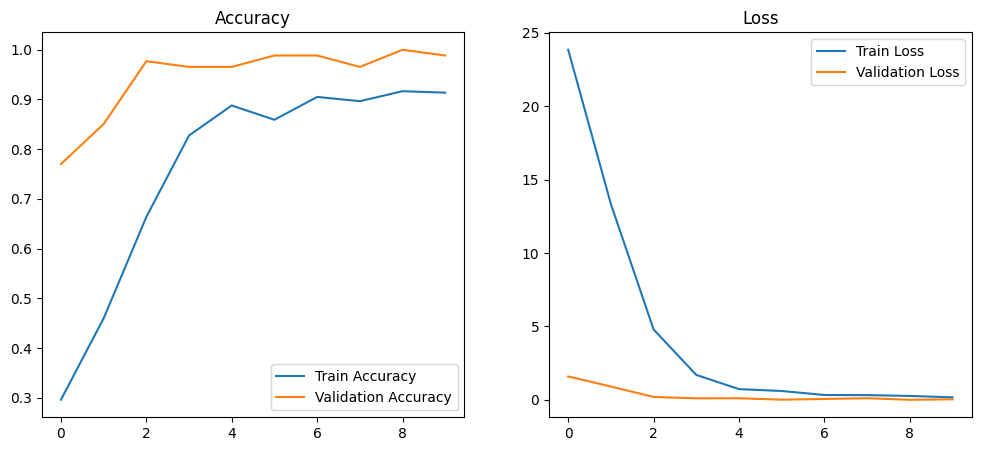

In [8]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()


In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(model, image_path, class_names):
    """
    This function:
    - Loads an image
    - Preprocesses it
    - Makes prediction
    - Prints predicted class name
    """

    # 1️⃣ Load image from disk
    img = image.load_img(
        image_path,
        target_size=IMAGE_SIZE
    )

    # 2️⃣ Convert image to array
    img_array = image.img_to_array(img)

    # 3️⃣ Expand dimensions (model expects batch)
    img_array = np.expand_dims(img_array, axis=0)

    # 4️⃣ Normalize image (same logic as training)
    img_array = img_array / 255.0

    # 5️⃣ Make prediction
    predictions = model.predict(img_array)

    # 6️⃣ Get index of highest probability
    predicted_class_index = np.argmax(predictions)

    # 7️⃣ Get class name
    predicted_class_name = class_names[predicted_class_index]

    # 8️⃣ Confidence score
    confidence = np.max(predictions) * 100

    # 9️⃣ Show image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f}%)")
    plt.show()

    # 🔟 Print result
    print("Predicted Class:", predicted_class_name)
    print("Confidence:", f"{confidence:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


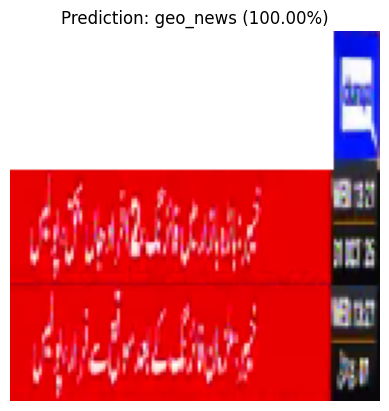

Predicted Class: geo_news
Confidence: 100.00%


In [22]:
image_path = "./predict_img/dunya02.png"
predict_image(model, image_path, class_names)
